Un profesor da teste care pot fi dificile, medii sau usoare. Probabilitatea dificultatii primului test este acelasi. Daca, la un moment dat da un test dificil, urmatorul test poate fi doar mediu sau usor, cu aceeasi probabilitate. Insa daca da un test mediu sau usor, atunci urmatorul test va fi dificil cu probabilitate 0.5 sau mediu sau usor cu aceeasi probabilitate, 0.25.
Nota unui student la test FB, B, S sau NS, depinde de dificultatea testului. Astfel, probabilitatile conditionate ale notei obtinute, data fiind dificultatea testului sunt:
test dificil: [0.1, 0.2, 0.4, 0.3]
test mediu: [0.15, 0.25, 0.5, 0.1]
test usor: [0.2, 0.3, 0.4, 0.1]

a) Utilizati libraria hmmlearn pentru a defini modelul Markov ascuns si desenati diagrama de stare

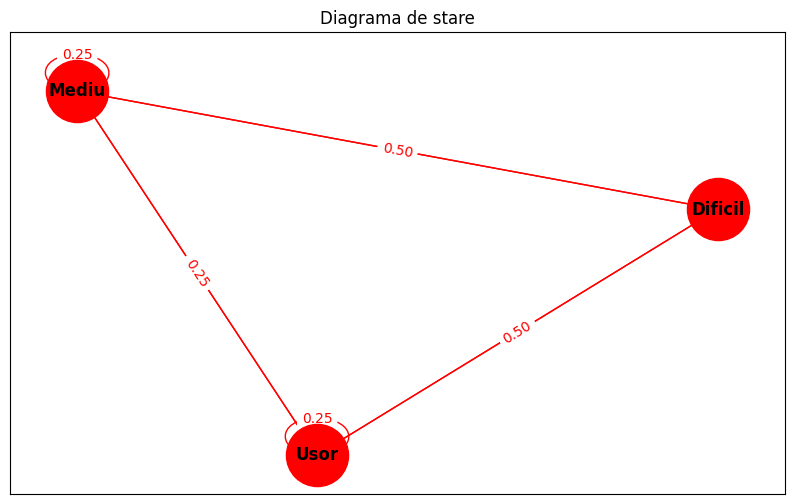

In [10]:
import numpy as np
import matplotlib.pyplot as plot
from hmmlearn import hmm
import networkx as nx

states = ["Dificil", "Mediu", "Usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

transition_matrix = np.array([
    [0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_matrix = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

start_probs = np.array([1/3, 1/3, 1/3])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probs
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

G = nx.DiGraph()

for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        if transition_matrix[i, j] > 0:
            G.add_edge(state_from, state_to, weight=transition_matrix[i, j])

plot.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="red")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="red")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

edge_labels = {(states[i], states[j]): f"{transition_matrix[i, j]:.2f}" for i in range(n_states) for j in range(n_states) if transition_matrix[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plot.title("Diagrama de stare")
plot.show()


b) Sa presupunem ca ati observat urmatoarea secventa de note: FB, FB, S, B, B, S, B, B, NS, B, B, S.
Determinati cea mai probabila secventa de dificultati pentru testele corespunzatoare

In [11]:
observed_notes = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B", "S"]
observed_indices = [observations.index(note) for note in observed_notes]
observed_indices = np.array(observed_indices).reshape(-1, 1)

logprob, state_sequence = model.decode(observed_indices, algorithm="viterbi")
prediction = [states[state] for state in state_sequence]

print("Secventa probabila:", prediction)


Secventa probabila: ['Usor', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Mediu', 'Dificil', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Mediu']
